In [1]:
import MDAnalysis as mda
import numpy as np
import nglview as nv
from pprint import pprint

Python 3.10.2


In [2]:
pdb_file = "6XDC.pdb"

In [3]:
u = mda.Universe(pdb_file)
#protein = u.select_atoms('protein')

/usr/local/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


## Following a tutorial

The following cells comprise my running through the tutorial [Advanced NGLview usage](https://projects.volkamerlab.org/teachopencadd/talktorials/T017_advanced_nglview_usage.html?highlight=nglview) by Jaime Rodríguez-Guerra and Dominique Sydow, 2021, Volkamer lab, Charité.

In [4]:
# The available color schemes
pprint(nv.color.COLOR_SCHEMES)

[' ',
 'picking',
 'random',
 'uniform',
 'atomindex',
 'residueindex',
 'chainindex',
 'modelindex',
 'sstruc',
 'element',
 'resname',
 'bfactor',
 'hydrophobicity',
 'value',
 'volume',
 'occupancy']


In [5]:
# Importing, aligning, filtering

import aligner as al

s_raw, *_ = al.utilities.read_fasta_file("./tests/P0DTC3.fasta") # P0DTC3: SARS-CoV-2 ORF3a
t_raw, *_ = al.utilities.read_fasta_file("./tests/P59632.fasta") # P59632: SARS-CoV ORF3a

s = al.utilities._str_str_to_FastaEntry(s_raw)
t = al.utilities._str_str_to_FastaEntry(t_raw)

a = al.aligner.Aligner(s, t)

Comparing
	275	sp|P0DTC3|AP3A_SARS2 ORF3a protein OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=3a PE=1 SV=1
	274	sp|P59632|AP3A_SARS ORF3a protein OS=Severe acute respiratory syndrome coronavirus OX=694009 GN=3a PE=1 SV=1
Matrix constructed (9.584 seconds)
Passes completed (10.599 seconds)
Done, completed in 12.005 seconds
	len 	start     	end       	sequence
	 160	(17, 17)  	(177, 177)	GEIKDATPSDFVRATATIPIQASLPFGWLIVGVALLAVFQSASKIITLKKRWQLALSKGVHFVCNLLLLFVTVYSHLLLVAAGLEAPFLYLYALVYFLQSINFVRIIMRLWLCWKCRSKNPLLYDANYFLCWHTNCYDYCIPYNSVTSSIVITSGDGTTSP
	 159	(18, 18)  	(177, 177)	EIKDATPSDFVRATATIPIQASLPFGWLIVGVALLAVFQSASKIITLKKRWQLALSKGVHFVCNLLLLFVTVYSHLLLVAAGLEAPFLYLYALVYFLQSINFVRIIMRLWLCWKCRSKNPLLYDANYFLCWHTNCYDYCIPYNSVTSSIVITSGDGTTSP
	  48	(190, 190)	(238, 238)	EKWESGVKDCVVLHSYFTSDYYQLYSTQLSTDTGVEHVTFFIYNKIVDE
	  35	(238, 239)	(273, 274)	PEEHVQIHTIDGSSGVVNPVMEPIYDEPTTTTSVPL
	  34	(239, 240)	(273, 274)	EEHVQIHTIDGSSGVVNPVMEPIYDEPTTTTSVPL
	  12	(0, 0)    	(12, 12)  	MDLF

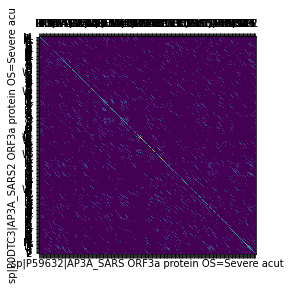

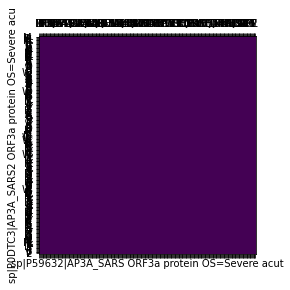

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [6]:
a.compare()

[0 0 0]
[2 2 2]


TypeError: Invalid shape (3,) for image data

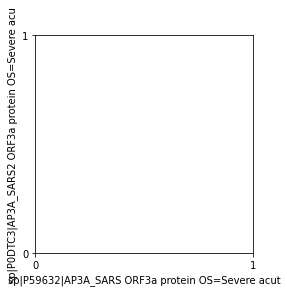

In [36]:
ttt = np.array([[2, 0, 0, 0], [0, 2, 0, 0], [0, 0, 2, 0], [0, 0, 0, 2]])
d1 = ttt[:, 1:].diagonal()
d2 = ttt[:, :-1].diagonal()
d = d1 + d2
print(d1)
print(d2)
a.plot_matrix(d)

In [8]:
def create_color_list(n, offset, color_func): 
    return [[f"#{color_func(pos):06x}", str(pos + offset)] for pos in range(0, n)]

from matplotlib import cm

def viridis(i): 
    vir = cm.get_cmap('cividis')
    mapped = np.interp(d[i], [d_min, d_max], [0., 1.]) # map value onto [0, 1]
    r, g, b, a = vir(mapped)
    hex_number = (int(r * 0xff) * 0xffff) + (int(r * 0xff) * 0xff) + int(r * 0xff)
    return hex_number


# Creating a colorscheme from the alignment
offset = u.select_atoms("segid A").residues.resnums[0]
d_max = d.max()
d_min = d.min()

alignment_color_list = create_color_list(len(d), offset, viridis)

In [9]:
# Create a custom color scheme based on the sequence alignments I make

nv.color.ColormakerRegistry.add_selection_scheme(
    "coolors", create_color_list(1000, 0, lambda n: n * 50000)
)
nv.color.ColormakerRegistry.add_selection_scheme(
    "alignment", alignment_color_list
)


In [10]:
#view = nv.show_pdbid("3pk2", default_representation=False)

view = nv.show_mdanalysis(u.atoms, default_representation=False)
view.clear_representations()
#view.add_representation("cartoon", "protein", color_scheme="")

view.add_representation("cartoon", ":A", color_scheme="alignment")
view.center()
view

/usr/local/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


NGLWidget()

In [11]:
view = nv.show_pdbid("1rfo", default_representation=False)
view.center()
view.add_cartoon(color_scheme="alignment")
view

NGLWidget()

In [12]:
atom_group = u.select_atoms("segid A")
atom_group.residues.resnums

array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 22

In [13]:
u.segments.segids

array(['A', 'B'], dtype=object)

In [14]:
from matplotlib import cm

def viridis(i): 
    vir = cm.get_cmap('viridis')
    mapped = np.interp(d[i], [d_min, d_max], [0., 1.]) # map value onto [0, 1]
    r, g, b, a = vir(mapped)
    hex_number = (int(r * 0xff) * 0xffff) + (int(r * 0xff) * 0xff) + int(r * 0xff)
    return hex_number

In [15]:
cm.cmaps_listed
    

{'magma': <matplotlib.colors.ListedColormap at 0x118aa13c0>,
 'inferno': <matplotlib.colors.ListedColormap at 0x118aa1360>,
 'plasma': <matplotlib.colors.ListedColormap at 0x118aa2830>,
 'viridis': <matplotlib.colors.ListedColormap at 0x118aa27d0>,
 'cividis': <matplotlib.colors.ListedColormap at 0x118aa28c0>,
 'twilight': <matplotlib.colors.ListedColormap at 0x118aa2950>,
 'twilight_shifted': <matplotlib.colors.ListedColormap at 0x118aa2980>,
 'turbo': <matplotlib.colors.ListedColormap at 0x118aa29b0>}

In [16]:
colormap = cm.get_cmap('inferno')

In [17]:
colormap(0.5)

(0.735683, 0.215906, 0.330245, 1.0)